# Visualising SMILES as Graphs

## Introducing an Example Polymer

Consider a polymer formed by ε-decalactone (εDL) and cyclohexene oxide + phthalic anhydride (CHO PA). The repeat units can be written in SMILES form as follows: 

In [2]:
e_dl = 'OC(CCCC)CCCCC(=O)'
cho_pa = 'OC1C(CCCC1)OC(=O)C1=CC=CC=C1C(=O)'

Which can be visialised in chemistry form with rdkit package:

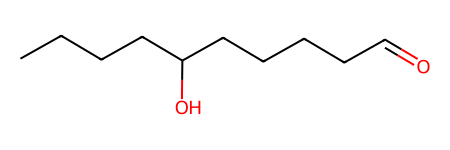

In [3]:
from rdkit import Chem
mol = Chem.MolFromSmiles(e_dl)
mol

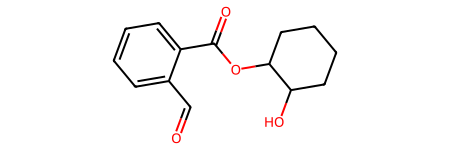

In [4]:
mol = Chem.MolFromSmiles(cho_pa)
mol

By combining CHO PA + εDL + CHO PA, for example, we concatenate the strings and print as below. Note that one must be familiar with how SMILES strings work in order for the concatenation connect the correct atoms. 

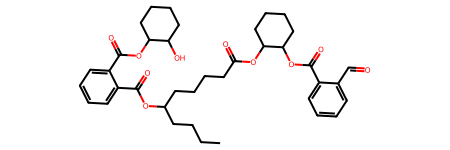

In [5]:
mol = Chem.MolFromSmiles(cho_pa + e_dl + cho_pa)
mol

## Tranforming them into Graphs

We first import pysmiles and, in particular, read_smiles. This will transform SMILES into networkX graphs. We will then print the graphs. 

In [13]:
from pysmiles import read_smiles
import networkx as nx
import matplotlib.pyplot as plt

network_x_graph = read_smiles(cho_pa, reinterpret_aromatic = False, explicit_hydrogen = False)

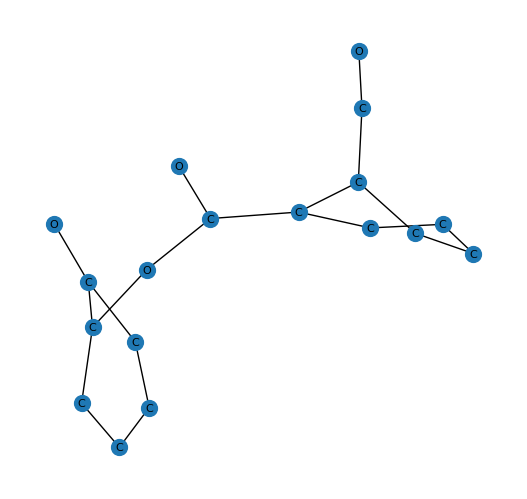

In [14]:
pos = nx.spring_layout(network_x_graph, seed = 119,k=0.10, iterations=24)
labels = {e: network_x_graph.edges[e]['order'] for e in network_x_graph.edges}
elements = nx.get_node_attributes(network_x_graph, name = "element")
nx.draw(network_x_graph, pos, with_labels=True, labels = elements, font_size=8,node_size = 130)

plt.gca().set_aspect('equal')

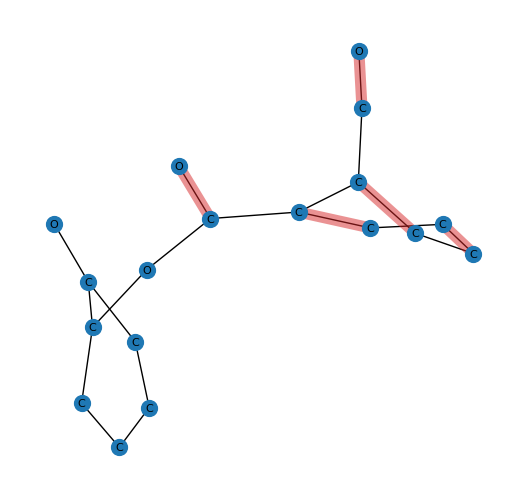

In [15]:
labels_1 = dict()
labels_2 = dict()
for lab in network_x_graph.edges:
#     if mol.edges[lab]['order'] == 1.5:
#     if mol.edges[lab]['order'] == 2 or mol.edges[lab]['order'] == 1:
    if network_x_graph.edges[lab]['order'] == 1:
        labels_1[lab] = 1
    else:
        labels_2[lab] = 2
elements = nx.get_node_attributes(network_x_graph, name = "element")

# pos = nx.spring_layout(mol, k=10)  # For better example looking
# nx.draw(mol, pos, with_labels=True)
pos = nx.spring_layout(network_x_graph, seed = 119,k=0.10, iterations=24)
labels = {e: network_x_graph.edges[e]['order'] for e in network_x_graph.edges}
nx.draw(network_x_graph, pos, with_labels=True, labels = elements, font_size=8,node_size = 130)
# nx.draw_networkx_edge_labels(mol, pos, edge_labels=labels)
nx.draw_networkx_edges(
    network_x_graph,
    pos,
    edgelist=labels_2.keys(),
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)


# plt.tight_layout()
# plt.axis("off")
# plt.show()
plt.gca().set_aspect('equal')